In [48]:
import random
import math
import numpy as np
import scipy.stats as stats
import statistics
from scipy.stats import wrapcauchy
import matplotlib.pyplot as plt



In [39]:
def rw2(n):# save the headings not the pairs
    #x,y=0,0
    x=np.zeros(n)
    y=np.zeros(n)
    theta=[0]*n
    theta[0]=wrapcauchy.rvs(c,loc=0,size=1)
    if theta[0]>2*math.pi:
            theta[0] = abs(theta[0] - 2* math.pi)
    if theta[0]<0:
            theta[0] = abs(theta[0] + 2* math.pi)
    for i in range(1,n):
        r=random.weibullvariate(alpha,beta)
        theta[i]=wrapcauchy.rvs(c,loc=theta[i-1],size=1)# c is the shape parameter
        if theta[i]>2*math.pi:
            theta[i] =abs(theta[i] - 2* math.pi)
        if theta[i]<0:
            theta[i] = abs(theta[i] + 2* math.pi)
        x[i]=x[i-1]+r*math.cos(theta[i])
        y[i]=y[i-1]+r*math.sin(theta[i])
        #x+=r*math.cos(theta[i])
        #y+=r*math.sin(theta[i])
    return theta 
n=int(input("how many steps?"))
alpha=int(input("what's the scale?"))
beta=int(input("what's the shape?"))
c=float(input("What's the shape parameter for the wrapped Cauchy?"))# this needs to be between 0 and 1
#tries=int(input("how many tries?"))
#or i in range(tries):
    #print(rw2(n))
data=rw2(n)
data

how many steps?100
what's the scale?2
what's the shape?5
What's the shape parameter for the wrapped Cauchy?0.9


[array([ 6.01735678]),
 array([ 5.96796748]),
 array([ 5.90532828]),
 array([ 6.12005649]),
 array([ 5.95038095]),
 array([ 5.66409125]),
 array([ 5.60612993]),
 array([ 5.52229593]),
 array([ 5.11768098]),
 array([ 5.21751336]),
 array([ 5.29342644]),
 array([ 5.02712003]),
 array([ 4.9812918]),
 array([ 5.01800646]),
 array([ 4.93419616]),
 array([ 4.93831902]),
 array([ 4.6488069]),
 array([ 4.69146808]),
 array([ 4.35372315]),
 array([ 5.63193547]),
 array([ 5.80086755]),
 array([ 1.92684338]),
 array([ 2.17848188]),
 array([ 1.92308305]),
 array([ 1.98358481]),
 array([ 2.08938219]),
 array([ 1.63830159]),
 array([ 1.03182267]),
 array([ 0.24840375]),
 array([ 0.54735054]),
 array([ 4.97987801]),
 array([ 5.13867873]),
 array([ 5.0714757]),
 array([ 5.15385153]),
 array([ 6.13016152]),
 array([ 6.24638054]),
 array([ 6.10127681]),
 array([ 6.18700035]),
 array([ 2.61754212]),
 array([ 3.26675566]),
 array([ 3.32914981]),
 array([ 3.51560189]),
 array([ 3.74185036]),
 array([ 3.653

In [25]:
# calculate the log likelihood of wrapcauchy
def log_wclikelihood(x,a,b):
     return sum(wrapcauchy.logpdf(x,c=a,loc=b))# c is the shape parameter
    

In [33]:
#n=100 #number of observations in a sample 
# initial guess for theta(a and b) as array,these are shape(c) and location(b)
guess = [0.9,0]
# Prepare storing MCMC chain as array of arrays.
A = [guess]
# define stepsize of MCMC.
stepsizes = [0.030,0.030]  # array of stepsizes
accepted  = 0.0
old_theta=guess# define initial values for theta 
old_loglik = log_wclikelihood(data,old_theta[0],old_theta[1])#calculate the first log likelihood
# Metropolis-Hastings with 10,000 iterations.
for p in range(10000):
    #old_theta  = A[len(A)-1]   old parameter value as array(not that elegant way)
    # Suggest new candidate from Gaussian proposal distribution.
    #new_theta = np.zeros([len(old_theta)])
    new_theta = old_theta + stats.norm(0, stepsizes).rvs() 
    #add the restraints on new_theta
    if new_theta[0]<0 or new_theta[0]>1: 
        continue
    new_loglik = log_wclikelihood(data,new_theta[0],new_theta[1])
    # Accept new candidate in Monte-Carlo fashing.
    if (new_loglik > old_loglik):
        A.append(new_theta)
        accepted = accepted + 1.0  # monitor acceptance
        old_loglik=new_loglik
        old_theta=new_theta
    else:
        u = random.uniform(0.0,1.0)
        if (u < math.exp(new_loglik - old_loglik)):
            A.append(new_theta)
            accepted = accepted + 1.0  # monitor acceptance
            old_loglik=new_loglik
            old_theta=new_theta
        #else:
            #A.append(old_alpha)(I guess this is not good)
print("Acceptance rate = "+str(accepted/10000.0))
#print(A)


Acceptance rate = 0.416


In [84]:
# save the posterior for a
a=[]
for i in range(len(A)-1):
    a.append(A[i-1][0])
#print(a,end='')   
statistics.mean(a)   


0.043866526078474299

In [89]:
b=[]
for i in range(len(A)-1):
    b.append(A[i-1][1])
#print(b,end='') 
statistics.mean(b)

-0.041175461654209017

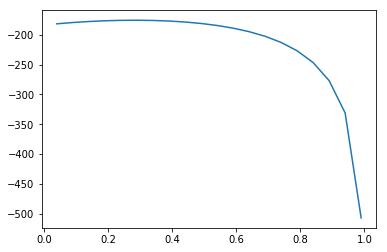

In [88]:
# plots now
from random import randint
plt.show()
loglike = np.zeros(100)
xval = np.zeros(100)

for i in range(100):
    xval[i]=0.04+i*0.05
    loglike[i] = log_wclikelihood(data,xval[i],2)# why 2? this is how I actually managed to get something
    

plt.plot(xval,loglike)



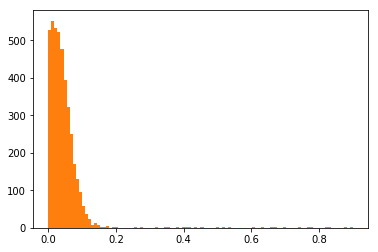

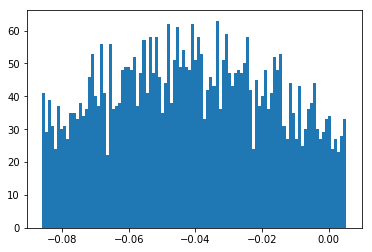

In [90]:
B=np.array(A)
plt.hist(B[:,0],bins=100)

plt.show()
plt.hist(B[:,1],bins=100)
plt.show()